# Data Exploration: Patents Assignments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
%matplotlib inline 

In [2]:
df = pd.read_csv("../csv/CleanedDatasetPatents.csv")

In [3]:
df["date_of_grant"] = pd.to_datetime(df["date_of_grant"])
df["date_of_application"] = pd.to_datetime(df["date_of_application"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565066 entries, 0 to 7565065
Data columns (total 11 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   id                   int64 
 1   file_id              int64 
 2   applicant_city       object
 3   applicant_state      object
 4   postcode             object
 5   country              object
 6   date_of_application  object
 7   date_of_grant        object
 8   application_year     int64 
 9   grant_year           int64 
 10  country_numerized    int64 
dtypes: int64(5), object(6)
memory usage: 634.9+ MB


In [5]:
df["time_between_appl_grant"] = (df["date_of_grant"] - df["date_of_application"]).dt.days

In [6]:
df.sort_values(by="date_of_application", inplace=True)

Let's remove outliers above the 97.5% quantile and below the 2.5% quantile

In [7]:
df = df[(df["time_between_appl_grant"]<df["time_between_appl_grant"].quantile(0.975)) & (df["time_between_appl_grant"]>df["time_between_appl_grant"].quantile(0.025))]

In [8]:
df = df[df["country"] != "NOT PROVIDED"]

In [9]:
df.country.value_counts()

country
USA                   3661338
JAPAN                 1282771
GERMANY                413344
KOREA, REPUBLIC OF     300051
TAIWAN                 199346
                       ...   
ZAMBIA                      1
MALI                        1
WALLIS AND FUTUNA           1
KIRIBATI                    1
LESOTHO                     1
Name: count, Length: 253, dtype: int64

In [10]:
#Extract ISO-Country code from the name of the Country
import pycountry
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

iso_map = {country: do_fuzzy_search(country) for country in df["country"].unique()}
df["country_code"] = df["country"].map(iso_map)

In [11]:
df.dropna(subset="country_code", inplace=True)

In [12]:
yearly_avg = df.groupby("application_year")["time_between_appl_grant"].mean()


In [13]:
yearly_avg.unique()

array([ 624.        ,  718.        , 1863.        , 1175.33333333,
       1294.        , 1324.13333333, 1357.        , 1178.03448276,
       1037.05882353,  853.86538462,  967.6746988 , 1006.75789474,
        884.39473684,  844.3173913 ,  818.97777778,  790.44654088,
        721.49071618,  693.13377193,  769.86993243,  906.84597433,
        963.58172531,  972.42061069,  807.50244808,  795.71569202,
        841.54065065,  853.5701982 ,  829.81734218,  786.1631776 ,
        747.15592663,  722.27336168,  695.31743407,  679.09680722,
        693.90694547,  690.93685976,  698.88631417,  703.5170485 ,
        721.52239359,  761.04327366,  837.76736376,  838.89587147,
        854.85649855,  893.44463531,  924.22788537,  987.34868646,
       1008.21319295, 1032.94186024, 1099.80194658, 1182.34759552,
       1221.62734612, 1243.11059194, 1246.40245548, 1230.42212728,
       1180.21801697, 1123.65334618, 1064.76384461, 1005.34147096,
        986.64567376,  956.95000458,  918.19627389,  881.96044

Text(0.5, 0, 'Application Year')

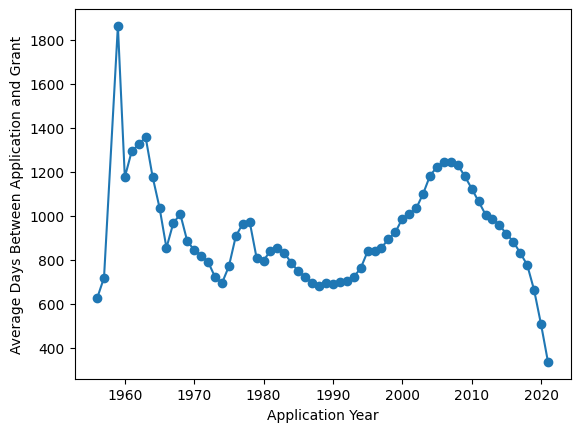

In [14]:
fig, ax = plt.subplots()

ax.plot(yearly_avg, marker='o')
ax.set_ylabel("Average Days Between Application and Grant")
ax.set_xlabel("Application Year")


In [15]:
count_per_country = df.groupby(by=["country","grant_year"])["id"].count()


Let's set a seed and extract a random sample from the dataset.

In [16]:
random_seed = 42
sampled_df = df.sample(100000,random_state=random_seed)



In [17]:
sampled_df.set_index("id",inplace=True)

In [18]:
sampled_df

,file_id,applicant_city,applicant_state,postcode,country,date_of_application,date_of_grant,application_year,grant_year,country_numerized,time_between_appl_grant,country_code
id,,,,,,,,,,,,
561020953,20,SANTA CLARA,CALIFORNIA,95054,USA,2019-05-10,2021-09-07,2019,2021,241,851,USA
108470135,4,DOVER,DELAWARE,19901,USA,1999-09-13,2003-12-09,1999,2003,241,1548,USA
232360165,10,HAMILTON,NaN,HM12,BERMUDA,2009-09-10,2013-01-08,2009,2013,23,1216,BMU
56970157,2,WARRENDALE,PENNSYLVANIA,NaN,USA,1991-04-08,1993-11-16,1991,1993,241,953,USA
409360889,16,BEIJING,NaN,100015,CHINA,2017-01-09,2019-01-22,2017,2019,42,743,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
397780405,16,ARMONK,NEW YORK,10504,USA,2016-06-30,2020-08-11,2016,2020,241,1503,USA
58850481,2,URAWASHI SAITAMAKEN,NaN,NaN,JAPAN,1991-10-11,1993-07-27,1991,1993,110,655,JPN
154640254,7,TOKYO,NaN,NaN,JAPAN,2003-12-24,2006-02-28,2003,2006,110,797,JPN


In [19]:
sampled_df.to_csv("sample_geomaps_patents.csv")

In [20]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the sample data
X = sampled_df[['country_numerized']]
y = sampled_df['time_between_appl_grant']
model.fit(X, y)

# Extract the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Apply the linear regression model to the original dataset
df['predicted_time_between_appl_grant'] = (df['country_numerized'] * slope) + intercept



In [21]:

# Specify the number of random entries to predict
num_entries_to_predict = 10000

random_seed_2=45
# Select a random subset of entries
random_entries = df.sample(n=num_entries_to_predict, random_state=random_seed_2)

# Predict time_between_appl_grant for the random entries
random_entries['predicted_time_between_appl_grant'] = (random_entries['country_numerized'] * slope) + intercept


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get the actual values for the random entries
actual_values = random_entries['time_between_appl_grant']

# Get the predicted values from your model
predicted_values = random_entries['predicted_time_between_appl_grant']

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 345.9622667438089
Mean Squared Error (MSE): 194184.45584272925
Root Mean Squared Error (RMSE): 440.6636538707603
R-squared (R2): 0.0019359964949484665
